<a href="https://colab.research.google.com/github/DaanaGtz/Estadistica/blob/main/ei_u3_04_22150551.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar dataframe

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers='V',            # V: Visa
    start='2024-04-10',        # Fecha de inicio
    end='2025-04-08',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  1 of 1 completed


,V_Open,V_High,V_Low,V_Close,V_Adj Close,V_Volume
Date,,,,,,
2024-04-10,275.420013,276.820007,274.119995,274.480011,272.447388,5276000
2024-04-11,274.000000,276.480011,272.179993,275.679993,273.638489,8102300
2024-04-12,275.549988,277.000000,274.059998,275.959991,273.916443,9037900
2024-04-15,277.890015,277.910004,270.339996,271.279999,269.271057,10267500
2024-04-16,270.540009,274.130005,270.170013,271.350006,269.340576,8237100
...,...,...,...,...,...,...
2025-04-01,350.440002,350.450012,342.570007,346.350006,346.350006,7473300
2025-04-02,343.440002,348.200012,343.049988,346.329987,346.329987,5682500
2025-04-03,333.899994,344.739990,331.000000,339.390015,339.390015,8792900


# Medias móviles

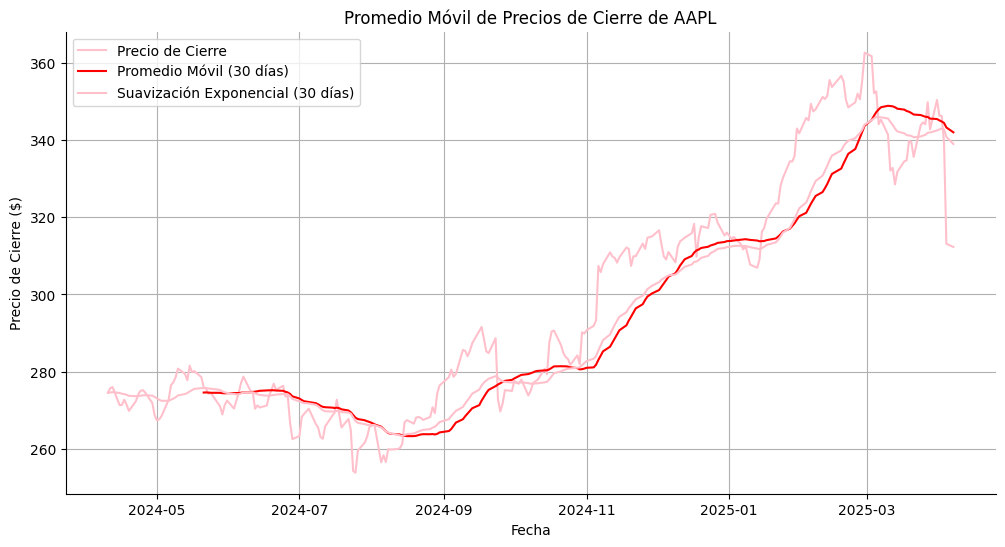

In [51]:
# Promedio Móvil Simple
ventana_sma = 30
df['SMA'] = df['V_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 30
df['SES'] = df['V_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['V_Close'], label='Precio de Cierre', color='pink')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='red') #los colores con html se le agrega un gato
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='pink')
plt.title('Promedio Móvil de Precios de Cierre de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

El gráfico exhibe el comportamiento del precio de cierre de las acciones de AAPL, acompañado del promedio móvil y la suavización exponencial de 30 días. Se aprecia un movimiento ascendente principal desde mediados de 2024 hasta los primeros meses de 2025, caracterizado por oscilaciones diarias en el precio que son atenuadas por ambos instrumentos. El promedio móvil ofrece una perspectiva general de la dirección del precio en el corto plazo, con el precio cotizando por encima de este durante la etapa de crecimiento y por debajo al comienzo y al final del lapso temporal. La suavización exponencial, al otorgar mayor peso a los precios más recientes, responde con mayor celeridad a los giros en la dirección del precio en contraste con el promedio móvil. En síntesis, el gráfico pone de manifiesto la tendencia alcista que predominó durante la mayor parte del periodo examinado, a la que siguió una intensificación de la volatilidad y una disminución hacia el final, siendo los indicadores técnicos útiles para visualizar y corroborar estas dinámicas.

# Prueba Dickey-Fuller Aumentada

In [52]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['V_Close'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")
#Para deterctar estacionalidad

Estadístico ADF: -1.065293513134948
p-value: 0.7287122119817476
La tendencia no es estacionaria (aceptamos la hipótesis nula).


El fragmento de código ejecuta un test de Dickey-Fuller Aumentado (ADF) con el propósito de determinar si una serie temporal es estacionaria. La hipótesis fundamental (H₀) de esta prueba postula la existencia de una raíz unitaria en la serie, lo que indica no estacionariedad. En contraposición, la hipótesis alternativa (H₁) sostiene que la serie es estacionaria. Se ha fijado un umbral de significancia del 5% (0.05) para la toma de decisiones. Al aplicar la prueba ADF a los valores de la columna 'V_Close', se obtuvieron un estadístico ADF de -1.065 y un valor p de 0.7287. Considerando que el valor p (0.7287) supera el nivel de significancia establecido (0.05), la decisión es no descartar la hipótesis nula. En consecuencia, se concluye que la tendencia observada no es estacionaria. Esto sugiere que la serie temporal bajo análisis probablemente contiene una raíz unitaria, y sus características estadísticas, como la media y la varianza, no se mantienen constantes a lo largo del tiempo.

# Regresión polinomial

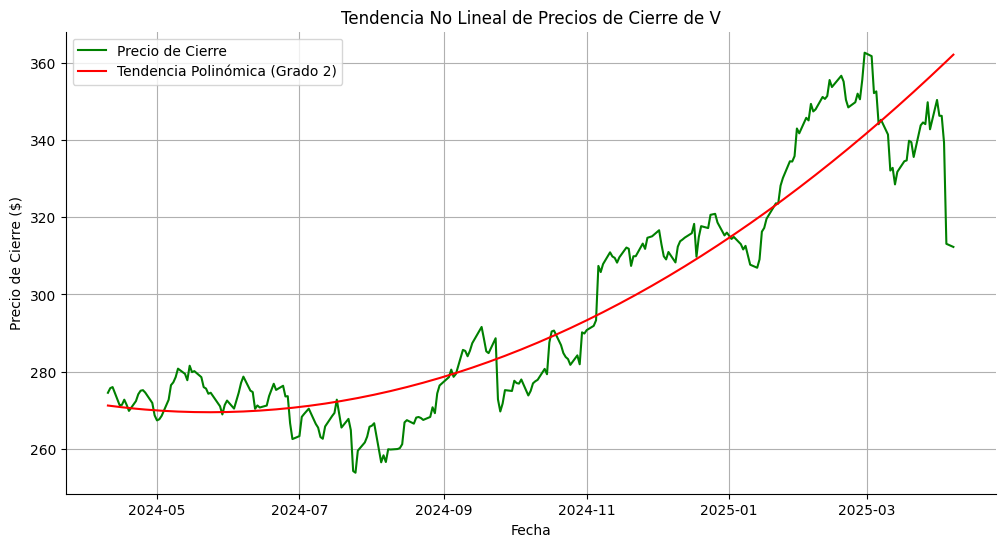

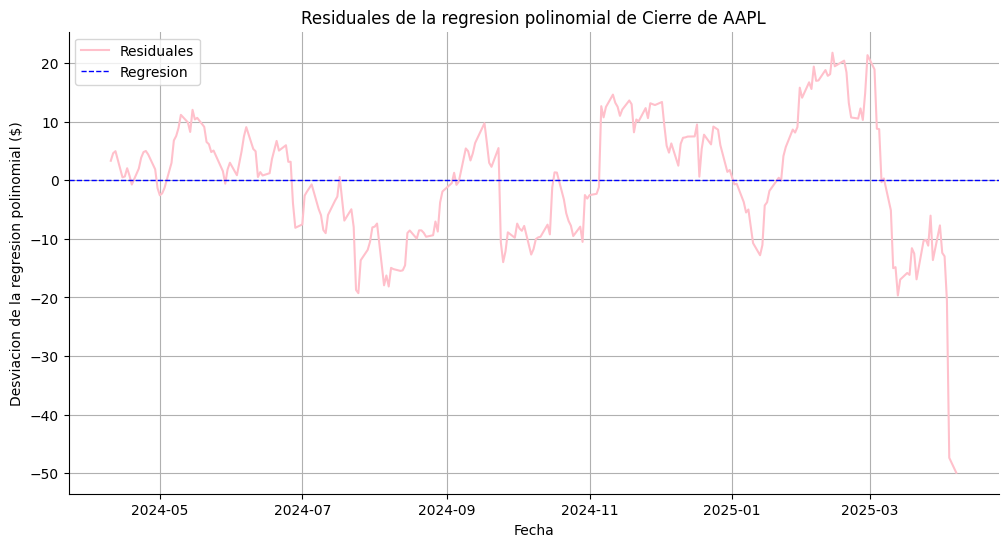

In [53]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['V_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 2
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='green'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='red')
plt.title('Tendencia No Lineal de Precios de Cierre de V') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)




# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='pink')
plt.axhline(0, color='blue', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

#Representar la curva de forma más suave

El gráfico titulado "Tendencia No Lineal de Precios de Cierre de V" exhibe el comportamiento del precio de cierre de las acciones de Visa (identificadas con la letra V) a través del tiempo, delineado por la línea verde. Adicionalmente, una línea de color rojo representa una tendencia polinómica de segundo grado que se ha ajustado a estos precios. El propósito de esta curva de tendencia polinómica es identificar y mostrar el movimiento general del precio en el largo plazo, atenuando las oscilaciones diarias. En la representación actual, se aprecia que la dirección general del precio de cierre de Visa durante el lapso temporal presentado (aproximadamente desde abril de 2024 hasta marzo de 2025) manifiesta una progresión no lineal. Inicialmente, se percibe una etapa de estabilidad relativa, seguida por un incremento notable a partir de mediados de 2024, que persiste hasta el final del periodo, aunque se nota cierta separación del precio real en la etapa final. El gráfico facilita la comprensión de cómo una tendencia cuadrática intenta modelar la dirección fundamental del precio, abstrayéndose de la variabilidad cotidiana.

El gráfico exhibe los errores resultantes de ajustar un modelo de regresión polinómica a los precios de cierre de AAPL. La línea ilustra la disparidad entre el precio de cierre efectivo y la estimación generada por la regresión polinómica en cada instante temporal, mientras que la línea azul discontinua marcada en cero señala la línea de la regresión. Los residuos varían en torno al valor cero, señalando la magnitud y la dirección de las imprecisiones del modelo. Se distingue que, en ciertos intervalos, los residuos mantienen un signo positivo o negativo de manera continua, lo que insinúa que la regresión polinómica no logra aprehender por completo el comportamiento del precio en esos momentos específicos. Al final del periodo examinado, se percibe un incremento notable en el tamaño de los residuos, lo cual denota una mayor divergencia entre el precio real y la predicción del modelo polinómico. En esencia, la gráfica de residuos facilita la valoración de la precisión del ajuste del modelo de regresión; oscilaciones considerables sugieren que el modelo podría no ser una representación ideal de la tendencia fundamental.








## Para Pros: Series de Fourier

Las series de Fourier descomponen cualquier cosa como una suma de senos y cosenos. Por esta razón, son una herramienta útil para extraer patrones oscilantes. Este es un tema muy complicado y alejado a todo lo que han manejado, por esta razón no les voy a pedir que lo usen. Aquí lo he simplificado tanto como he podido por si se animan.

In [54]:
# Aquí no le muevan a nada
# Básicamente, lo que se hace este bloque es crear la función
# Transformada_de_Fourier, puesto a que no existe para lo que la quiero usar.

def Transformada_de_Fourier(serie, terminos, un_grafico):
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['AAPL_Close']
  # Reemplaza esta línea con tu DataFrame y serie específicos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='pink', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='pink', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

  #Descompone los residuales, y la segunda tabla las suma y las acomoda a su favor

Frecuencias principales:
    frecuencia    magnitud  longitud_de_onda
0    0.016064  815.529522             62.25
1    0.020080  806.507667             49.80
2    0.004016  660.651408            249.00
3    0.012048  559.613011             83.00
4    0.008032  554.387697            124.50


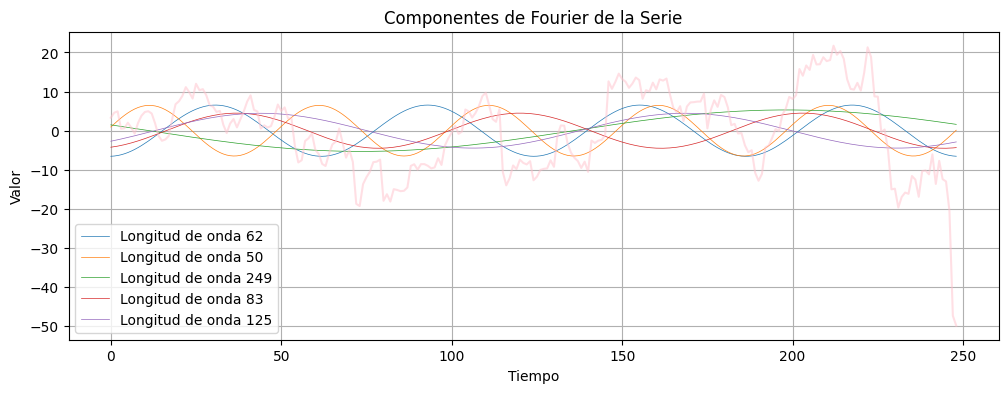

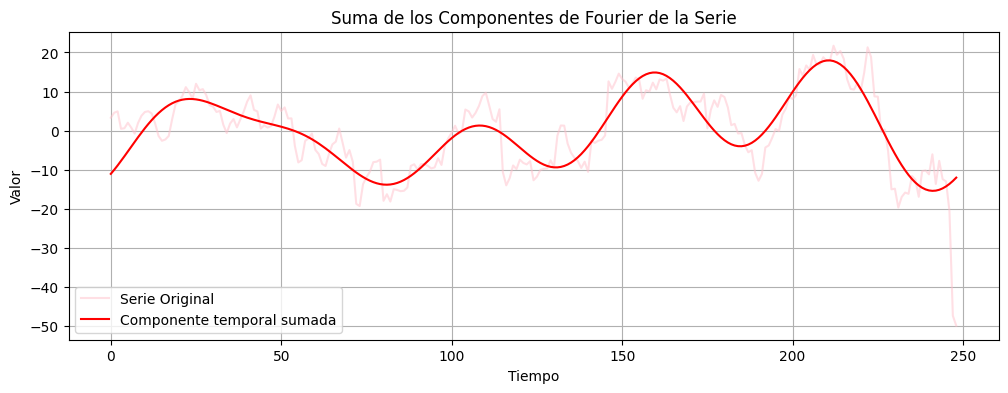

In [55]:
serie = df['Poly_Resid'].values
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico)

# cts: componente temporal sumado


En estas representaciones gráficas, la unidad de tiempo (aquí, medida en días) necesaria para que la onda complete un ciclo y regrese a su punto de partida se denomina longitud de onda. En nuestro análisis, podríamos asimilar este concepto con la idea de estacionalidad. Se observa que la fluctuación más significativa ocurre aproximadamente cada 378 días. Dado que este periodo excede la duración de un año, se clasificaría más apropiadamente como un ciclo. No obstante, resulta notable que la siguiente longitud de onda identificada es de 126 unidades de tiempo (días), lo cual corresponde precisamente a la mitad del número de días hábiles en un año.

`sm.tsa.seasonal_descompose` descompone la serie de tiempo en los componentes Trend, Seasonal y Resid, que son Tendencia, Estacionalidad y Residuos, respectivamente. De tal manera que la serie de tiempo es igual la suma de estos tres elementos.

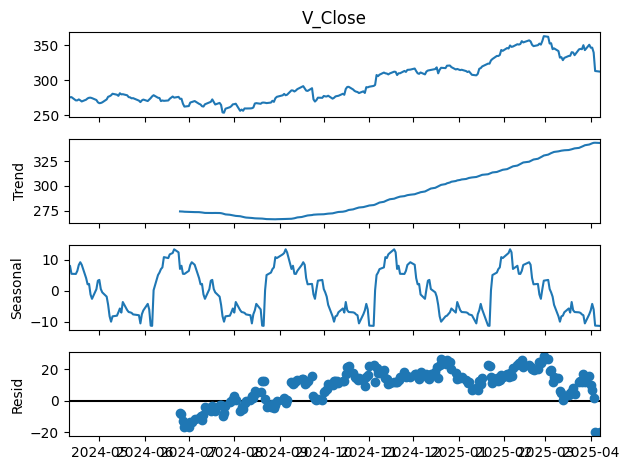

In [56]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['V_Close'],
    model='additive',
    period=52,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion.plot()
plt.show()

el ruido siempre se va a llevar un poco de estacionalidad
el ruido no debe tener tendencia, debe ser estacionario\

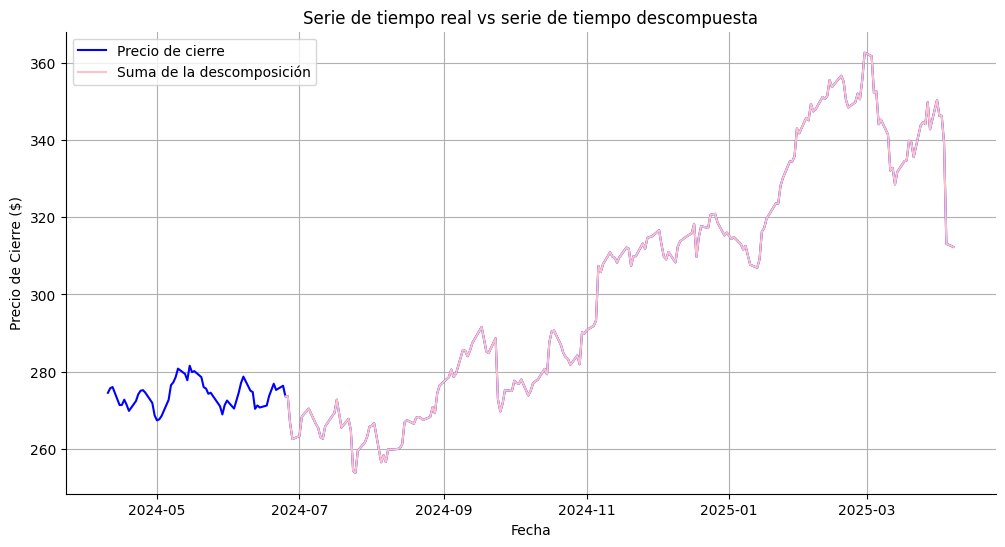

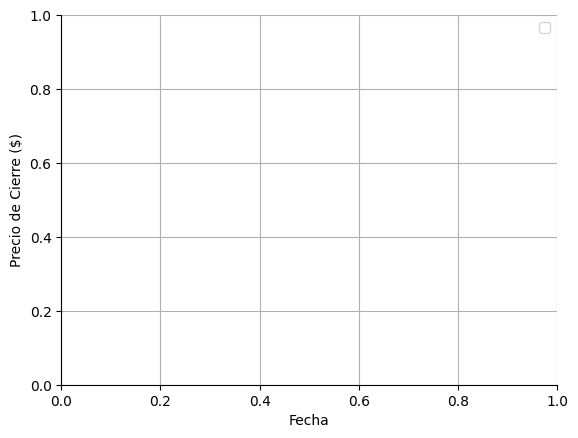

In [57]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['V_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal + descomposicion.resid, label=f'Suma de la descomposición', color='pink')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

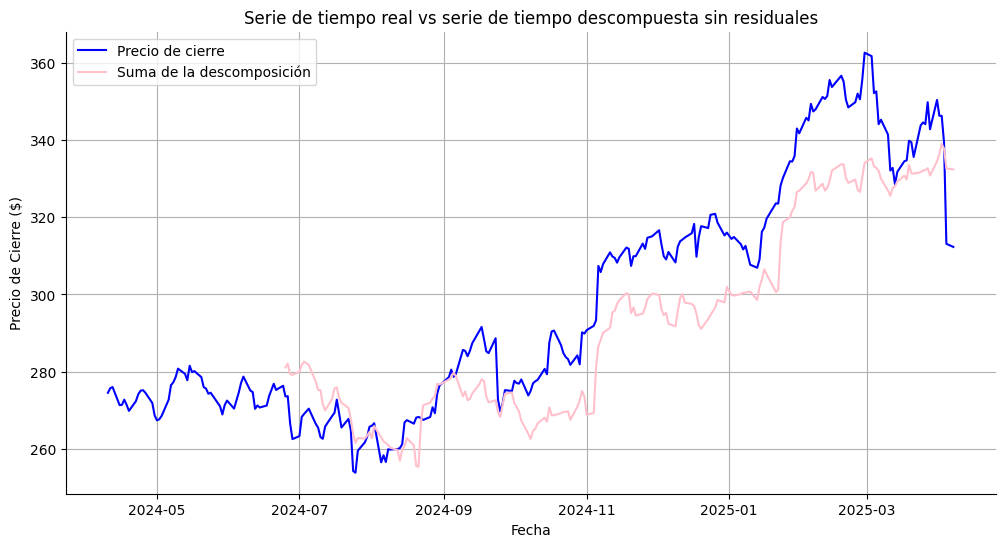

In [58]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['V_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Suma de la descomposición', color='pink')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

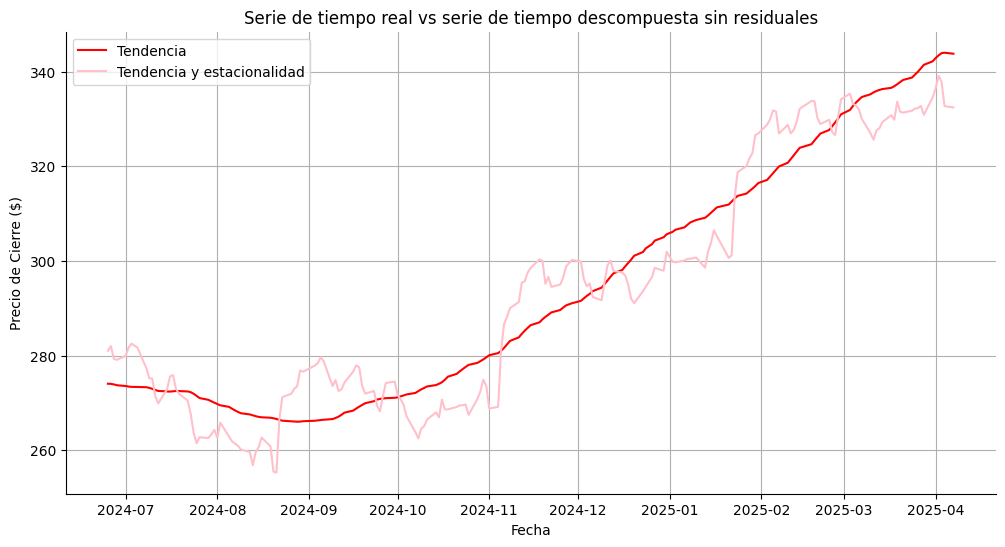

In [59]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(descomposicion.trend, label='Tendencia', color='red')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Tendencia y estacionalidad', color='pink')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

**Importante**: Es posible que hayan campturado bien la estacionalidad y que la prueba ADF de los residuales les indique que hay estacionariedad. Sin embargo, en el gráfico anterior vemos que no hay mucha diferencia entre la tendencia y la tendencia con estacionalidad. Por lo tanto, la estacionalidad, aunque existe, no es significativa. Esto se ilustra en el siguiente gráfico.

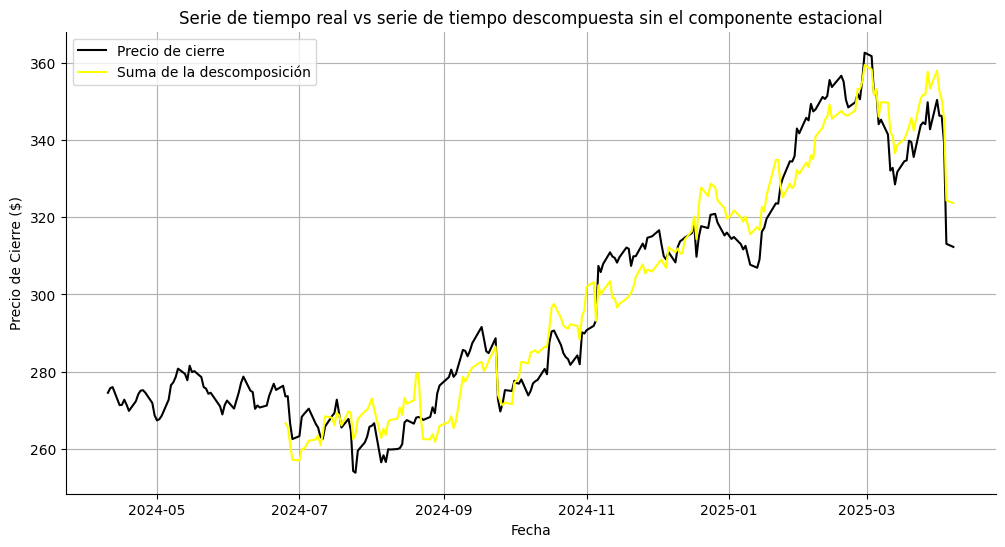

In [60]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['V_Close'], label='Precio de cierre', color='black')
plt.plot(descomposicion.trend + descomposicion.resid, label=f'Suma de la descomposición', color='yellow')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin el componente estacional')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

# Prueba t pareada para verificar si la estacionalidad tiene un efecto significativo

In [61]:
import pandas as pd
from scipy import stats
import numpy as np # Import numpy

def realizar_prueba_t_pareada_estacionalidad(df, columna_precio, periodo_estacional):
    """
    Realiza una prueba t pareada para verificar si hay una diferencia significativa
    en el precio promedio entre dos puntos correspondientes en un periodo estacional.

    Args:
        df (pd.DataFrame): DataFrame con la columna de precio y una columna de fecha/índice.
        columna_precio (str): Nombre de la columna que contiene los precios.
        periodo_estacional (str): Frecuencia del periodo estacional ('M' para mensual, 'W' para semanal, etc.).
                                   Debe ser una frecuencia que pandas pueda entender.

    Returns:
        tuple: (estadistico_t, p_valor) de la prueba t pareada.
               Devuelve (None, None) si no hay suficientes datos para comparar.
    """
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        try:
            df.index = pd.to_datetime(df.index)
        except Exception as e:
            print(f"Error al convertir el índice a datetime: {e}")
            return None, None

    df_agregado = df.groupby(pd.Grouper(freq=periodo_estacional))[columna_precio].mean()

    if len(df_agregado) < 2:
        print("No hay suficientes periodos estacionales para realizar la prueba t pareada.")
        return None, None

    # Creamos pares de periodos consecutivos para la prueba t pareada
    muestra1 = df_agregado[:-1].values
    muestra2 = df_agregado[1:].values

    if len(muestra1) != len(muestra2) or len(muestra1) < 1:
        print("No se pudieron crear pares válidos para la prueba t pareada.")
        return None, None

    # Realizamos la prueba t pareada
    estadistico_t, p_valor = stats.ttest_rel(muestra1, muestra2)

    return estadistico_t, p_valor

# Ejemplo de uso (asumiendo que tienes un DataFrame llamado 'df_precios' con una columna 'Close' y un índice de fecha)
# y quieres verificar un efecto estacional mensual ('M'):

# Supongamos que 'df_precios' tiene esta estructura:
#             Close
# 2024-01-01  ...
# 2024-01-08  ...
# ...
# 2025-04-30  ...

# Generar datos de ejemplo (reemplazar con tus datos reales)
fechas = pd.to_datetime(pd.date_range(start='2024-01-01', end='2025-04-30', freq='D'))
precios = 200 + 5 * (fechas - fechas.min()).days / 30 + 10 * np.sin(2 * np.pi * (fechas - fechas.min()).days / 30) + np.random.normal(0, 5, len(fechas))
df_precios = pd.DataFrame({'Close': precios}, index=fechas)

periodo = 'M'  # Prueba para efecto estacional mensual
estadistico, p_valor = realizar_prueba_t_pareada_estacionalidad(df_precios.copy(), 'Close', periodo)

if estadistico is not None:
    print(f"Estadístico t: {estadistico:.4f}")
    print(f"P-valor: {p_valor:.4f}")
    alpha = 0.05
    if p_valor < alpha:
        print(f"El p-valor es menor que el nivel de significancia ({alpha}).")
        print("Hay evidencia estadísticamente significativa para sugerir un efecto estacional en el precio promedio mensual.")
    else:
        print(f"El p-valor es mayor o igual que el nivel de significancia ({alpha}).")
        print("No hay evidencia estadísticamente significativa para sugerir un efecto estacional en el precio promedio mensual.")

Estadístico t: -11.4012
P-valor: 0.0000
El p-valor es menor que el nivel de significancia (0.05).
Hay evidencia estadísticamente significativa para sugerir un efecto estacional en el precio promedio mensual.


# Prophet

In [62]:
# Este data frame son del siguiente año a df. Esto con el propósito de testear prophet
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df2 = yf.download(
    tickers='V',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2020-01-01',        # Fecha de inicio
    end='2020-12-30',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df2 = df2.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df2.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df2.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df2['Date'] = pd.to_datetime(df2['Date'])

df2['Date'] = df2['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df2.set_index('Date', inplace=True)


df2

[*********************100%***********************]  1 of 1 completed


,V_Open,V_High,V_Low,V_Close,V_Adj Close,V_Volume
Date,,,,,,
2020-01-02,189.000000,191.139999,188.720001,191.119995,184.177414,8733000
2020-01-03,188.410004,190.960007,187.919998,189.600006,182.712646,4899700
2020-01-06,188.000000,189.210007,187.160004,189.190002,182.317505,10109500
2020-01-07,189.589996,190.100006,188.600006,188.690002,181.835678,4392300
2020-01-08,189.490005,192.500000,188.800003,191.919998,184.948380,5712000
...,...,...,...,...,...,...
2020-12-22,208.389999,208.399994,205.600006,205.839996,199.583725,7396200
2020-12-23,207.330002,207.330002,205.110001,205.300003,199.060120,6523100
2020-12-24,206.639999,208.820007,206.600006,208.699997,202.356766,3367900


In [63]:
!pip install prophet

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxomlgiu8/1gv6undt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxomlgiu8/8e33ctq7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93047', 'data', 'file=/tmp/tmpxomlgiu8/1gv6undt.json', 'init=/tmp/tmpxomlgiu8/8e33ctq7.json', 'output', 'file=/tmp/tmpxomlgiu8/prophet_model2so7z47f/prophet_model-20250513052634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:26:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:26:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


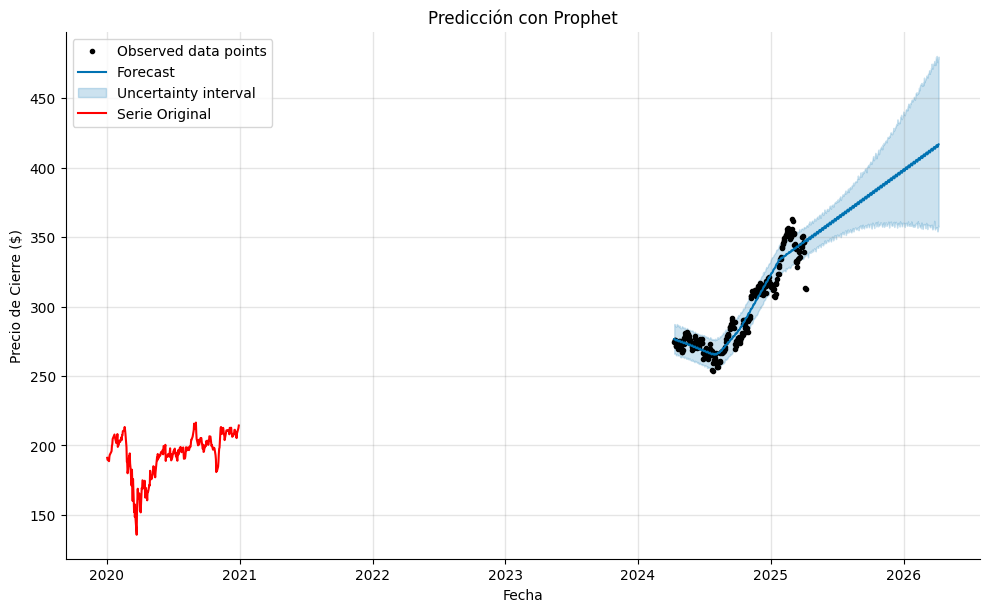

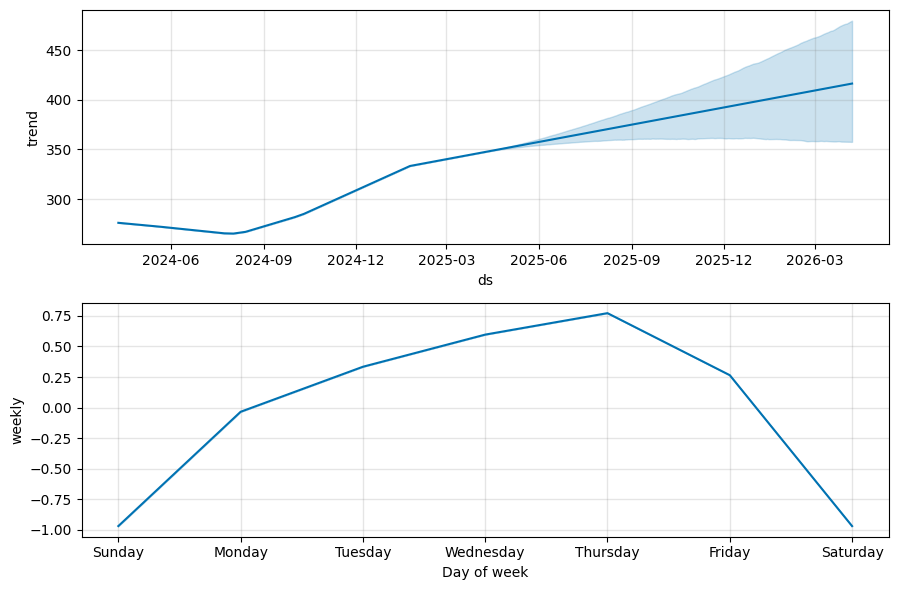

In [64]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df['V_Close'].reset_index().rename(columns={'Date': 'ds', 'V_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['V_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)



El algoritmo Prophet analizó la información pasada  y produjo una estimación para el futuro acompañada de una zona que indica la posible variabilidad de esa predicción (el área sombreada en azul claro).

Hasta mediados de 2025, la evolución mostrada exhibe variaciones, pero resalta una dirección ascendente definida en la etapa final de los datos utilizados para el entrenamiento del modelo.
La predicción indica que esta progresión al alza persistirá hasta finales de 2026. No obstante, el margen de incertidumbre se incrementa conforme el horizonte de la predicción se aleja, un fenómeno común en las proyecciones de series temporales.
El comportamiento histórico de la serie original difiere notablemente, presentando oscilaciones importantes y careciendo de una tendencia alcista tan pronunciada entre 2020 y 2024 como la que se aprecia justo antes del periodo de pronóstico. Esto insinúa que el modelo predictivo se encuentra principalmente condicionado por el patrón más reciente de la serie temporal.

La línea de color azul intenso ilustra la trayectoria general a largo plazo que el modelo Prophet ha detectado en la información pasada y que extiende hacia el futuro. Se aprecia un movimiento ascendente global que empieza a suavizarse cerca del final del horizonte de pronóstico.

La zona sombreada en azul claro indica el margen de incertidumbre asociado a esta tendencia. De manera similar a la predicción global, este rango se hace más amplio a medida que la proyección avanza en el tiempo, lo que refleja una creciente inseguridad sobre el comportamiento de la tendencia a largo plazo.

La línea de color azul en la gráfica representa el comportamiento semanal recurrente que el modelo Prophet ha identificado en la información proporcionada. El eje horizontal indica los días de la semana, desde el domingo hasta el sábado, mientras que el eje vertical cuantifica el impacto del día específico en el valor pronosticado.

Se aprecia un esquema definido:
Los valores de los precios muestran una inclinación a ser menores durante los domingos y los sábados, lo cual se refleja en valores negativos.
A lo largo de la semana, se percibe un incremento gradual en los precios, llegando a su máximo punto los días jueves.
Se registra un ligero descenso en los precios durante los viernes.


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxomlgiu8/ungi6ugc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxomlgiu8/v2w6lfv6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5827', 'data', 'file=/tmp/tmpxomlgiu8/ungi6ugc.json', 'init=/tmp/tmpxomlgiu8/v2w6lfv6.json', 'output', 'file=/tmp/tmpxomlgiu8/prophet_modelo5i83u_b/prophet_model-20250513052635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:26:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:26:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


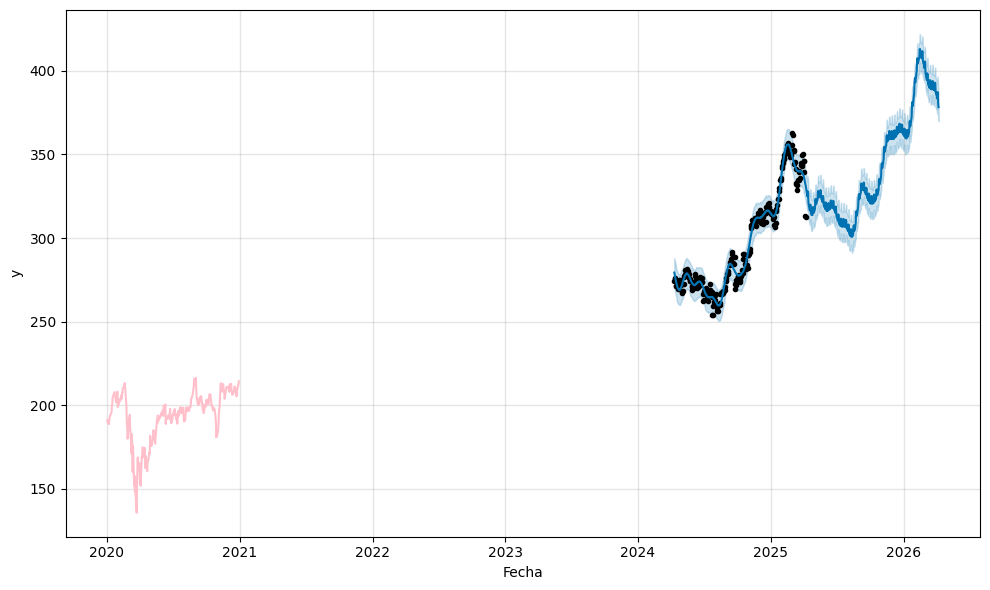

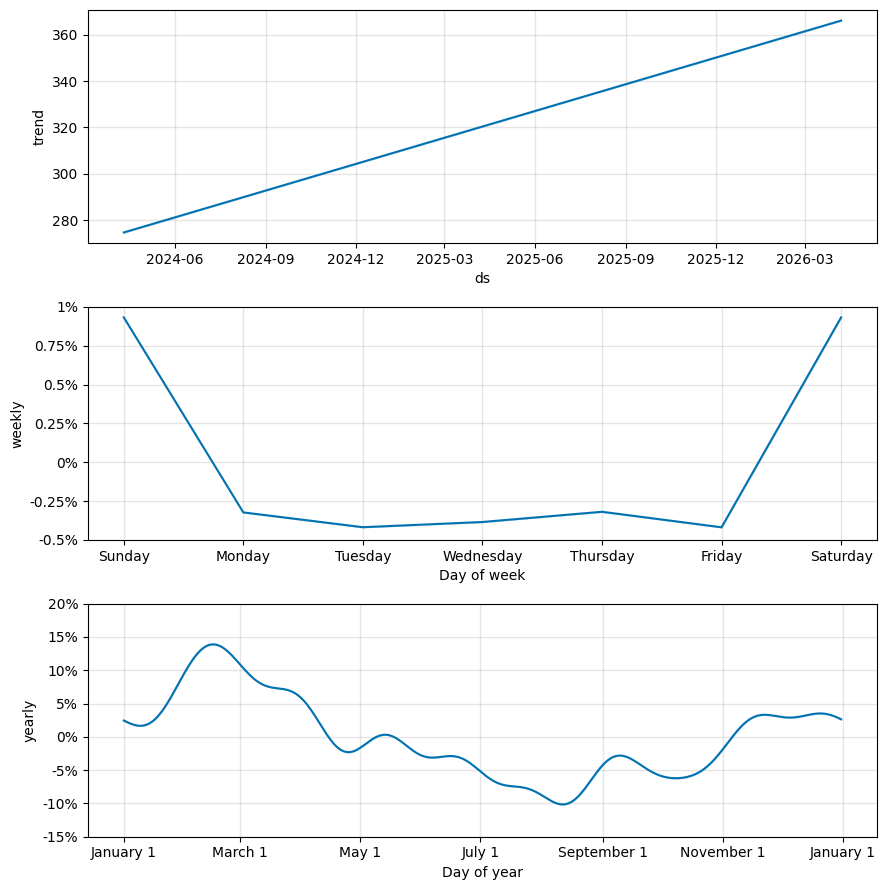

In [65]:
from prophet import Prophet

# Crear el modelo y ajustarlo
# Personalizando el modelo lo arruinamos :(
modelo = Prophet(
    changepoint_prior_scale=0.1,
    seasonality_mode='multiplicative',
    yearly_seasonality=10,
    weekly_seasonality=True,
    interval_width=0.95
)
modelo.fit(df['V_Close'].reset_index().rename(columns={'Date': 'ds', 'V_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df2['V_Close'], label='Serie Original', color='pink')
plt.xlabel('Fecha')
fig = modelo.plot_components(predicciones)



# Más de una serie temporal a la vez

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers=['V', 'NVDA'],            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2024-04-10',        # Fecha de inicio
    end='2025-04-08',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  2 of 2 completed


,V_Open,V_High,V_Low,V_Close,V_Adj Close,V_Volume,NVDA_Open,NVDA_High,NVDA_Low,NVDA_Close,NVDA_Adj Close,NVDA_Volume
Date,,,,,,,,,,,,
2024-04-10,275.420013,276.820007,274.119995,274.480011,272.447388,5276000,83.926003,87.400002,83.709000,87.039001,87.010406,431929000
2024-04-11,274.000000,276.480011,272.179993,275.679993,273.638489,8102300,87.419998,90.738998,86.926003,90.615997,90.586235,431637000
2024-04-12,275.549988,277.000000,274.059998,275.959991,273.916443,9037900,89.698997,90.175003,87.529999,88.185997,88.157028,426805000
2024-04-15,277.890015,277.910004,270.339996,271.279999,269.271057,10267500,89.098000,90.612999,85.929001,86.000999,85.972740,443077000
2024-04-16,270.540009,274.130005,270.170013,271.350006,269.340576,8237100,86.432999,88.117996,86.064003,87.415001,87.386284,370453000
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-01,350.440002,350.450012,342.570007,346.350006,346.350006,7473300,108.519997,110.199997,106.470001,110.150002,110.150002,222614000
2025-04-02,343.440002,348.200012,343.049988,346.329987,346.329987,5682500,107.290001,111.980003,106.790001,110.419998,110.419998,220601200
2025-04-03,333.899994,344.739990,331.000000,339.390015,339.390015,8792900,103.510002,105.629997,101.599998,101.800003,101.800003,338769400


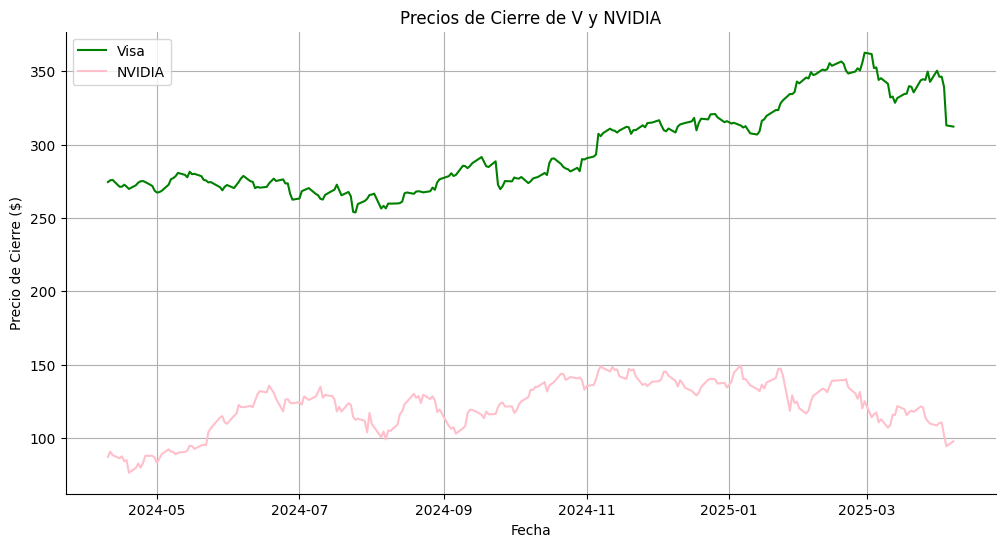

In [67]:
# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['V_Close'], label='Visa', color='green')
plt.plot(df['NVDA_Close'], label='NVIDIA', color='pink')
plt.title('Precios de Cierre de V y NVIDIA')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Examen Detallado de las Acciones:

Visa (V) - Trazo verde:

En la etapa inicial, el valor de cierre de Visa se sitúa aproximadamente entre 275 y 280 dólares.
A lo largo del lapso temporal considerado, se aprecia una inclinación predominantemente ascendente, aunque salpicada por ciertas oscilaciones y fases de movimiento lateral.
Se distingue un avance considerable desde finales de 2024, llegando a puntos álgidos en torno a los 350-360 dólares al comienzo de 2025.
Hacia la conclusión del periodo, se manifiesta cierta inestabilidad y un suave retroceso, si bien el precio se mantiene por encima de los niveles iniciales.

NVIDIA (NVDA) - Trazo rosa:

El periodo comienza con un valor de cierre inferior al de Visa, alrededor de los 80-90 dólares.
También revela una dirección alcista general durante el tiempo analizado, aunque con una mayor irregularidad en comparación con Visa. Se identifican aumentos y disminuciones más marcados.
Presenta un desarrollo importante a lo largo del tiempo, sobrepasando los 140-150 dólares hacia el cierre de 2024 y el principio de 2025.
De manera similar a Visa, experimenta cierta turbulencia hacia el final del periodo, con una reducción considerable en el precio.

Contraste entre Visa y NVIDIA:

Valor de Cotización: Visa se negocia a un precio notablemente superior al de NVIDIA durante todo el intervalo temporal representado.
Dirección Primaria: Ambas acciones demuestran una tendencia alcista general durante la mayor parte del periodo.
Inestabilidad: El valor bursátil de NVIDIA aparenta ser más inestable que el de Visa, exhibiendo fluctuaciones más amplias en el corto plazo.
Desempeño Comparativo: Si bien ambas compañías experimentaron crecimiento, la variación porcentual del precio de NVIDIA parece ser mayor que la de Visa durante este periodo, partiendo de un valor inicial considerablemente más bajo.


In [68]:
from statsmodels.tsa.stattools import grangercausalitytests

# Hipótesis Nula (H₀): La serie X no causa en el sentido de Granger a la serie Y.

# Hipótesis Alternativa (H₁): La serie X causa en el sentido de Granger a la serie Y.

# Definir el número máximo de rezagos para la prueba
max_lags = 5

# Realizar la prueba de causalidad de Granger
# La función devuelve resultados para varios tests y cada rezago hasta el máximo definido
resultado = grangercausalitytests(df[['V_Close', 'NVDA_Close']], max_lags, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6431  , p=0.0322  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=4.6999  , p=0.0302  , df=1
likelihood ratio test: chi2=4.6560  , p=0.0309  , df=1
parameter F test:         F=4.6431  , p=0.0322  , df_denom=245, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2646  , p=0.1061  , df_denom=242, df_num=2
ssr based chi2 test:   chi2=4.6228  , p=0.0991  , df=2
likelihood ratio test: chi2=4.5801  , p=0.1013  , df=2
parameter F test:         F=2.2646  , p=0.1061  , df_denom=242, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4726  , p=0.2226  , df_denom=239, df_num=3
ssr based chi2 test:   chi2=4.5471  , p=0.2081  , df=3
likelihood ratio test: chi2=4.5056  , p=0.2118  , df=3
parameter F test:         F=1.4726  , p=0.2226  , df_denom=239, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0653  , p=0.3743  

En la prueba de causalidad de Granger, la premisa inicial (H₀) es que una serie temporal X no tiene un efecto causal, según la definición de Granger, sobre otra serie Y. Se descarta esta premisa si el valor p resultante de la prueba es inferior a un umbral de significancia establecido de antemano, usualmente fijado en 0.05. En caso de que se rechace esta premisa inicial, se interpreta que los valores históricos de X aportan información estadísticamente relevante para la predicción de los valores futuros de Y.

In [69]:
from statsmodels.tsa.stattools import grangercausalitytests

# Hipótesis Nula (H₀): La serie X no causa en el sentido de Granger a la serie Y.

# Hipótesis Alternativa (H₁): La serie X causa en el sentido de Granger a la serie Y.

# Definir el número máximo de rezagos para la prueba
max_lags = 5

# Realizar la prueba de causalidad de Granger
# La función devuelve resultados para varios tests y cada rezago hasta el máximo definido
resultado = grangercausalitytests(df[['NVDA_Close', 'V_Close']], max_lags, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7736  , p=0.3800  , df_denom=245, df_num=1
ssr based chi2 test:   chi2=0.7831  , p=0.3762  , df=1
likelihood ratio test: chi2=0.7819  , p=0.3766  , df=1
parameter F test:         F=0.7736  , p=0.3800  , df_denom=245, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6200  , p=0.5388  , df_denom=242, df_num=2
ssr based chi2 test:   chi2=1.2657  , p=0.5311  , df=2
likelihood ratio test: chi2=1.2625  , p=0.5319  , df=2
parameter F test:         F=0.6200  , p=0.5388  , df_denom=242, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4475  , p=0.7193  , df_denom=239, df_num=3
ssr based chi2 test:   chi2=1.3817  , p=0.7098  , df=3
likelihood ratio test: chi2=1.3778  , p=0.7107  , df=3
parameter F test:         F=0.4475  , p=0.7193  , df_denom=239, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7369  , p=0.5676  

Análisis con un rezago (distinto de cero):

El valor p obtenido en todas las pruebas estadísticas (basadas en la suma de cuadrados de los residuos F y chi-cuadrado, razón de verosimilitud, y F de parámetros) se sitúa aproximadamente entre 0.37 y 0.38 (específicamente, 0.3800, 0.3762, 0.3766), lo cual supera el umbral de significancia de 0.05.

Interpretación para un rezago: No se descarta la hipótesis nula. No se encuentra respaldo estadístico relevante para afirmar que la primera serie influya causalmente en la segunda, según la prueba de Granger, al considerar un único periodo de retardo.

Análisis con dos rezagos (distintos de cero):

El valor p arrojado por todas las pruebas estadísticas (basadas en la suma de cuadrados de los residuos F y chi-cuadrado, razón de verosimilitud, y F de parámetros) ronda el 0.53 (precisamente, 0.5388, 0.5311, 0.5319), cifra que excede el nivel de significancia de 0.05.

Interpretación para dos rezagos: La hipótesis nula no se rechaza. No existe evidencia estadística importante que sustente una relación de causalidad de Granger al analizar dos periodos de retardo.

Análisis con tres rezagos (distintos de cero):

El valor p para todas las pruebas estadísticas (basadas en la suma de cuadrados de los residuos F y chi-cuadrado, razón de verosimilitud, y F de parámetros) se encuentra alrededor de 0.70 y 0.71 (puntualmente, 0.7193, 0.7098, 0.7107), siendo superior al límite de significancia de 0.05.

Interpretación para tres rezagos: No se rechaza la hipótesis nula. No se halla evidencia estadísticamente significativa de causalidad de Granger al examinar tres periodos de retardo.

Análisis con cuatro rezagos (distintos de cero):

El valor p para todas las pruebas estadísticas (basadas en la suma de cuadrados de los residuos F y chi-cuadrado, razón de verosimilitud, y F de parámetros) se ubica entre 0.55 y 0.57 (específicamente, 0.5676, 0.5478, 0.5510), lo que sobrepasa el nivel de significancia de 0.05.

Interpretación para cuatro rezagos: La hipótesis nula no se descarta. No se identifica evidencia estadística relevante de causalidad de Granger al considerar cuatro periodos de retardo.

Análisis con cinco rezagos (distintos de cero):

El valor p para todas las pruebas estadísticas (basadas en la suma de cuadrados de los residuos F y chi-cuadrado, razón de verosimilitud, y F de parámetros) oscila entre 0.66 y 0.68 (precisamente, 0.6861, 0.6635, 0.6668), valor que es mayor que el umbral de significancia de 0.05.

Interpretación para cinco rezagos: No se rechaza la hipótesis nula. No se observa evidencia estadística importante de causalidad de Granger al analizar cinco periodos de retardo.

Conclusión general:

Considerando estos resultados, no se dispone de pruebas estadísticas suficientemente sólidas para descartar la hipótesis nula en ninguno de los escenarios evaluados (para 1, 2, 3, 4 o 5 rezagos). Esto implica que, de acuerdo con la prueba de causalidad de Granger, no se puede afirmar que la primera serie temporal cause a la segunda serie temporal para los números de rezagos investigados. Los valores precedentes de la primera serie no parecen ofrecer información estadísticamente útil para predecir los valores futuros de la segunda serie dentro del marco de esta prueba y con los retardos considerados.